### 图像特征区域

- edge 边缘
- corner 角点
- blob 斑点

#### 1. Harris Corner Detection 哈里斯角点检测

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from helper import showimg
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

filename = 'images/filter/1.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,255,0]

dst_b = dst>0.01*dst.max()

dst_n = dst_b.flatten()

In [3]:
filename = 'images/origin/5.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,10,3,0.04)

dst[0]
dst = cv.dilate(dst,None)
dst[0]
ids = dst>0.01*dst.max()

In [ ]:
dst.shape

In [ ]:
class Shape:
    def __init__(self, size=(10, 10, 3), fill=(0, 255, 255)):
        self.size = size
        self.fill = fill
    def draw(self):
        rect = np.full(self.size, self.fill)
        return rect

class Grid:
    def __init__(self, size=(10, 10), boxes = []):
        self.size = size
        self.boxes = boxes
    def draw(self):
        rows, cols = self.size
        count = 0
        box_num = len(self.boxes)
        grid = np.array([])
        for i in range(rows):
            row_box = np.array([])
            for j in range(cols):
                dbox = self.boxes[count % box_num].draw()
                count += 1
                if row_box.size == 0:
                    row_box = dbox
                else:
                    row_box = np.hstack((row_box, dbox))
            if grid.size == 0:
                grid = row_box
            else:
                grid = np.vstack((grid, row_box))
        return grid

grid1 = Grid(size = (5, 5), boxes = [Shape(fill = (0,0,0)), Shape(fill = (255, 255, 255))])

grid2 = Grid(size = (7, 7), boxes = [Shape(fill = (255, 0, 0)), Shape(fill = (0, 255, 0)), Shape(fill = (0, 0, 255))])

grid1_img = grid1.draw()
grid2_img = grid2.draw()
plt.imshow(grid1_img)
# plt.imshow(grid2.draw())

In [ ]:
# cv.imwrite('black_white.jpg', grid1_img)
# cv.imwrite('rgb.jpg', grid2_img[:, :, [2, 1, 0]])

In [ ]:
img_wb = cv.imread('black_white.jpg')
img_rgb = cv.imread('rgb.jpg')[:, :, [2, 1, 0]]

In [ ]:
img_wb_gray = cv.cvtColor(img_wb, cv.COLOR_BGR2GRAY)
img_rgb_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
plt.imshow(img_wb_gray)
# plt.imshow(img_rgb)
cv.imwrite('black_white_gray.jpg', img_wb_gray)

In [ ]:
corners = cv.goodFeaturesToTrack(img_wb_gray, 50, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    print(x, y)
    cv.circle(img_wb,(x,y),1, 255,-1)
plt.imshow(img_wb)

In [ ]:
sift = cv.xfeatures2d.SIFT_create()

In [ ]:
kp = sift.detect(img_wb_gray, None)

In [ ]:
img_wb_kp = cv.drawKeypoints(img_wb_gray, kp, img_wb)

In [ ]:
plt.imshow(img_wb_kp)

In [ ]:
kp,des = sift.compute(img_wb_gray,kp)

In [ ]:
des.shape

In [ ]:
surf = cv.xfeatures2d.SURF_create()

In [ ]:
kp, des = surf.detectAndCompute(img_wb_gray, None)

In [ ]:
des.shape

In [4]:
orb = cv.ORB_create()

In [ ]:
img1_origin = cv.imread('images/origin/2.jpg')
img1_rotate = cv.imread('images/rotate/2.jpg')

In [ ]:
kp1, des1 = orb.detectAndCompute(img1_origin,None)
kp2, des2 = orb.detectAndCompute(img1_rotate,None)

In [ ]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

In [ ]:
matches = bf.match(des1,des2)

In [ ]:
matches = sorted(matches, key = lambda x:x.distance)

In [ ]:
img3 = cv.drawMatches(img1_origin, kp1, img1_rotate, kp2, matches, None, flags=2)

In [ ]:
plt.imshow(img3)

In [ ]:
len(matches)

In [ ]:
des2.shape

In [ ]:
for match in matches[:44]:
    print('{} - {} - {} - {}'.format(match.distance, match.trainIdx, match.queryIdx, match.imgIdx))

In [ ]:
des1.flatten().shape

In [ ]:
des2.flatten().shape

In [ ]:
des2.shape

In [ ]:
des2

In [15]:
from img_feature import draw_matches, get_matches, img_fingerprint, print_matches

In [ ]:
draw_matches('images/origin/5.jpg', 'images/rotate/5.jpg')

In [ ]:
draw_matches('images/origin/5.jpg', 'images/filter/5.jpg')

In [8]:
matches = get_matches('images/origin/6.jpg', 'images/crop/6.jpg')
print_matches(matches, num=50)

distance=11.0 trainIdx=115 queryIdx=146 imgIdx=0
distance=12.0 trainIdx=411 queryIdx=394 imgIdx=0
distance=12.0 trainIdx=432 queryIdx=429 imgIdx=0
distance=13.0 trainIdx=42 queryIdx=21 imgIdx=0
distance=13.0 trainIdx=410 queryIdx=407 imgIdx=0
distance=14.0 trainIdx=9 queryIdx=38 imgIdx=0
distance=15.0 trainIdx=62 queryIdx=46 imgIdx=0
distance=15.0 trainIdx=76 queryIdx=105 imgIdx=0
distance=16.0 trainIdx=126 queryIdx=119 imgIdx=0
distance=17.0 trainIdx=353 queryIdx=376 imgIdx=0
distance=17.0 trainIdx=356 queryIdx=390 imgIdx=0
distance=18.0 trainIdx=70 queryIdx=54 imgIdx=0
distance=18.0 trainIdx=51 queryIdx=87 imgIdx=0
distance=18.0 trainIdx=354 queryIdx=374 imgIdx=0
distance=19.0 trainIdx=40 queryIdx=50 imgIdx=0
distance=19.0 trainIdx=245 queryIdx=213 imgIdx=0
distance=19.0 trainIdx=289 queryIdx=284 imgIdx=0
distance=19.0 trainIdx=277 queryIdx=290 imgIdx=0
distance=20.0 trainIdx=46 queryIdx=66 imgIdx=0
distance=20.0 trainIdx=71 queryIdx=84 imgIdx=0
distance=20.0 trainIdx=157 queryIdx=17

In [5]:
from img_feature import img_similarity as imsim

In [3]:
imsim('images/origin/10.jpg', 'images/rotate/10.jpg')

29

In [6]:
for i in range(12):
    print('{}.jpg\tfilter: {}\trotate: {}\tcrop: {}'.format(i+1,
                                                            imsim('images/origin/{}.jpg'.format(i+1), 'images/filter/{}.jpg'.format(i+1)),
                                                            imsim('images/origin/{}.jpg'.format(i+1), 'images/rotate/{}.jpg'.format(i+1)),
                                                            imsim('images/origin/{}.jpg'.format(i+1), 'images/crop/{}.jpg'.format(i+1))))

1.jpg	filter: 60	rotate: 44	crop: 0
2.jpg	filter: 47	rotate: 40	crop: 0
3.jpg	filter: 66	rotate: 55	crop: 0
4.jpg	filter: 50	rotate: 46	crop: 0
5.jpg	filter: 46	rotate: 41	crop: 0
6.jpg	filter: 39	rotate: 36	crop: 0
7.jpg	filter: 20	rotate: 14	crop: 0
8.jpg	filter: 62	rotate: 54	crop: 0
9.jpg	filter: 74	rotate: 69	crop: 0
10.jpg	filter: 29	rotate: 29	crop: 0
11.jpg	filter: 75	rotate: 82	crop: 0
12.jpg	filter: 10	rotate: 11	crop: 0


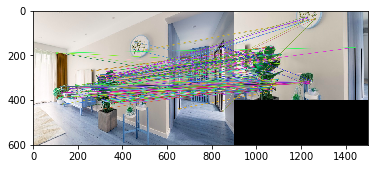

In [13]:
draw_matches('images/origin/1.jpg', 'images/crop/1.jpg')

In [15]:
def adj_sim(threshold = 0):
    for i in range(12):
        print('{}.jpg\tfilter: {}\trotate: {}\tcrop: {}'.format(i+1,
                                                            imsim('images/origin/{}.jpg'.format(i+1), 'images/filter/{}.jpg'.format(i+1), threshold=threshold),
                                                            imsim('images/origin/{}.jpg'.format(i+1), 'images/rotate/{}.jpg'.format(i+1), threshold=threshold),
                                                            imsim('images/origin/{}.jpg'.format(i+1), 'images/crop/{}.jpg'.format(i+1), threshold=threshold)))

In [41]:
adj_sim(0)

1.jpg	filter: 60	rotate: 44	crop: 0
2.jpg	filter: 47	rotate: 40	crop: 0
3.jpg	filter: 66	rotate: 55	crop: 0
4.jpg	filter: 50	rotate: 46	crop: 0
5.jpg	filter: 46	rotate: 41	crop: 0
6.jpg	filter: 39	rotate: 36	crop: 0
7.jpg	filter: 20	rotate: 14	crop: 0
8.jpg	filter: 62	rotate: 54	crop: 0
9.jpg	filter: 74	rotate: 69	crop: 0
10.jpg	filter: 29	rotate: 29	crop: 0
11.jpg	filter: 75	rotate: 82	crop: 0
12.jpg	filter: 10	rotate: 11	crop: 0


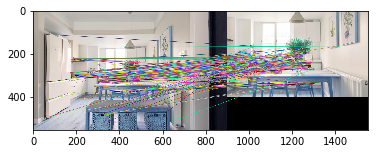

In [39]:
draw_matches('images/origin/3.jpg', 'images/crop/3.jpg')

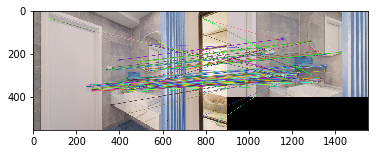

In [40]:
draw_matches('images/origin/12.jpg', 'images/crop/12.jpg')

In [6]:
from os import listdir, path

In [43]:
listdir('images/')

['crop', 'filter', 'origin', 'rotate']

In [10]:
def findAllImg(rootdir):
    images = []
    if not path.isdir(rootdir):
        return images
    dirs = listdir(rootdir)
    for d in dirs:
        dp = path.join(rootdir, d)
        if path.isfile(dp):
            if '.jpg' in dp:
                images.append(dp)
        elif path.isdir(dp):
            images += findAllImg(dp)
    return images

In [11]:
all_images = findAllImg('images')

In [72]:
imsim(all_images[12], all_images[24])

60

In [75]:
all_images[12].split('\\')[-2]

'filter'

In [12]:
def mat2str(mat):
    row_str_list = list()
    for row in mat:
        row_str = ' '.join(list(map(lambda x:str(x), row)))
        row_str_list.append(row_str)
    return '-'.join(row_str_list)

class ImSeq:
    def __init__(self, imlist):
        self.imlist = imlist
    def seq(self):
        imlist = self.imlist
        seqlist = list()
        for im in imlist:
            seqdict = dict()
            impathlist = im.split('\\')
            seqdict['label'] = impathlist[-2]
            seqdict['path'] = im.replace('\\', '/')
            seqdict['token'] = impathlist[-2] + '-' + impathlist[-1].split('.')[0]
            seqdict['fp'] = mat2str(img_fingerprint(im)[0])
            seqlist.append(seqdict)
        return seqlist

In [13]:
imseq = ImSeq(all_images)

In [14]:
imgs = imseq.seq()

NameError: name 'img_fingerprint' is not defined

In [8]:
def simrank(ims, idx, threshold = 0):
    imref = ims[idx]
    simlist = list()
    for idx, im in enumerate(ims):
        simdict = dict()
        sim = imsim(imref['path'], im['path'], threshold=threshold)
        if sim > 0:
            simdict['sim'] =  sim/ 500
            simdict['token'] = im['token']
            simdict['idx'] = idx
            simlist.append(simdict)
    return sorted(simlist, key = lambda x:x['sim'], reverse = True)

In [103]:
import numpy as np

In [104]:
charar = np.chararray((3, 3))

In [107]:
charar

chararray([[b'a', b'a', b'a'],
           [b'a', b'a', b'a'],
           [b'a', b'a', b'a']], dtype='|S1')

In [106]:
charar[:] = 'a'

In [109]:
charar.tostring()

b'aaaaaaaaa'

In [121]:
a = np.random.randint(1, 5, size=(2, 2))

In [122]:
a

array([[2, 1],
       [3, 2]])

In [125]:
type(a[0])

numpy.ndarray

In [128]:
list(map(lambda x:str(x), a[0]))

['2', '1']

In [162]:
57186 - 41507

15679

In [211]:
from time import time

for i in range(len(imgs)):
    start = time()
    rg = list(map(lambda x:x['token'], simrank(imgs, i, 5)[:5]))
    print('{}s\t{}'.format(time()-start, '\t'.join(rg)))

1.097071886062622s	crop-1
1.0890779495239258s	crop-10	rotate-10	origin-10	filter-10
1.122997522354126s	crop-11	origin-11	rotate-11	filter-11
1.0721237659454346s	crop-12	origin-12	filter-12	rotate-12
1.132960557937622s	crop-2	filter-2	rotate-2	origin-2
1.131962776184082s	crop-3	filter-3	origin-3	rotate-3
1.1249823570251465s	crop-4	rotate-4	filter-4	origin-4
1.0801019668579102s	crop-5
0.9285082817077637s	crop-6
1.0820972919464111s	crop-7
1.13492751121521s	crop-8	rotate-8	origin-8	filter-8
1.1549010276794434s	crop-9	filter-9	origin-9	rotate-9
1.5368766784667969s	filter-1	origin-1	rotate-1
1.3633427619934082s	filter-10	rotate-10	origin-10	crop-10
1.4191935062408447s	filter-11	origin-11	rotate-11	crop-11
1.451162338256836s	filter-12	rotate-12	origin-12	crop-12
1.4870107173919678s	filter-2	rotate-2	origin-2	crop-2
1.414172649383545s	filter-3	origin-3	rotate-3	crop-3
1.4750423431396484s	filter-4	origin-4	rotate-4	crop-4
1.4391396045684814s	filter-5	rotate-5	origin-5
1.387277603149414s	filter-

In [16]:
simrank(imgs, 0, 5)

NameError: name 'imgs' is not defined

In [206]:
time()

1555060012.865739